## Import Libraries


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
import os
import tensorflow

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, AveragePooling2D, BatchNormalization
import keras
from keras.utils import np_utils

In [0]:
!pip install -q pyyaml h5py 

## Mount Drive

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [0]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


## Prepare Data

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

training_set = train_datagen.flow_from_directory(
    "/content/drive/My Drive/testing_set",
    target_size=(64, 64),
    batch_size=32,
    color_mode='grayscale',
    class_mode='binary',
    subset='training',
    shuffle=True,
    seed=42) # set as training data

validation_set = train_datagen.flow_from_directory(
    "/content/drive/My Drive/testing_set", # same directory as training data
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale',
    subset='validation',
    shuffle=True,
    seed=42) # set as validation data


Found 1634 images belonging to 2 classes.
Found 407 images belonging to 2 classes.


In [0]:
training_set.class_indices

{'plane': 0, 'ship': 1}

## Model 1 (C-C-C-MP-C-C-MP-C-C-MP)

In [0]:
model = Sequential()
#Convolve-Pool
model.add(Conv2D(128,(3,3), input_shape = (64,64,1), activation = 'relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))


#Flatten
model.add(Flatten())
#Fully-connected
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(Dense(units=1, activation = 'sigmoid'))

decay_rate = 0.001/100
adamopt = tensorflow.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=decay_rate)

model.compile(loss='binary_crossentropy', optimizer=adamopt, metrics=['accuracy'])

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 62, 62, 128)       1280      
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 62, 62, 128)       147584    
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 62, 62, 64)        73792     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 31, 31, 64)        36928     
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 31, 31, 64)      

In [0]:
checkpoint_path = "/content/drive/My Drive/training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tensorflow.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
history = model.fit_generator(training_set,  epochs = 100, validation_data = validation_set,shuffle=True,validation_steps=12,
          callbacks=[cp_callback])

Epoch 1/100
12/52 [=====>........................] - ETA: 11s - loss: 0.5776 - acc: 0.7083
Epoch 00001: saving model to /content/drive/My Drive/training_1/cp.ckpt
52/52 [==============================] - 12s 226ms/step - loss: 0.6234 - acc: 0.6591 - val_loss: 0.5776 - val_acc: 0.7083
Epoch 2/100
12/52 [=====>........................] - ETA: 10s - loss: 0.5466 - acc: 0.7422
Epoch 00002: saving model to /content/drive/My Drive/training_1/cp.ckpt
52/52 [==============================] - 9s 173ms/step - loss: 0.4497 - acc: 0.8091 - val_loss: 0.5466 - val_acc: 0.7422
Epoch 3/100
12/52 [=====>........................] - ETA: 11s - loss: 0.6466 - acc: 0.7161
Epoch 00003: saving model to /content/drive/My Drive/training_1/cp.ckpt
52/52 [==============================] - 9s 173ms/step - loss: 0.5101 - acc: 0.7650 - val_loss: 0.6466 - val_acc: 0.7161
Epoch 4/100
12/52 [=====>........................] - ETA: 10s - loss: 0.5720 - acc: 0.7734
Epoch 00004: saving model to /content/drive/My Drive/tra

In [0]:
model.save(filepath="/content/drive/My Drive/training_1/model.h5")

In [0]:
new_model = tensorflow.keras.models.load_model('/content/drive/My Drive/training_1/model.h5')
new_model.summary()
loss, acc = new_model.evaluate(validation_set, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100*acc))

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 62, 62, 128)       1280      
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 62, 62, 128)       147584    
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 62, 62, 64)        73792     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 31, 31, 64)        36928     
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 31, 31, 64)      

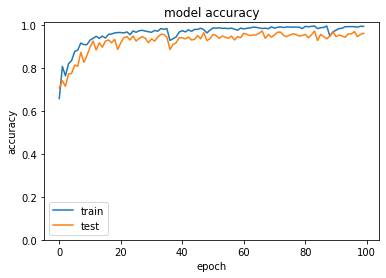

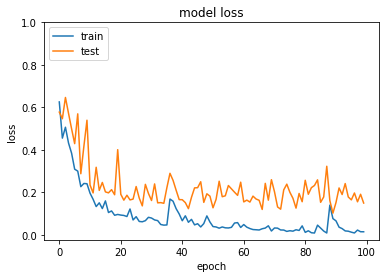

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower left')
plt.ylim(ymin=0)
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(ymax=1)
plt.show()

## Model 1.5

In [0]:
model = Sequential()
#Convolve-Pool
model.add(Conv2D(128,(3,3), input_shape = (64,64,1), activation = 'relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

#Flatten
model.add(Flatten())
#Fully-connected
model.add(Dense(units=128, activation = 'relu'))
model.add(Dense(units=128, activation = 'relu'))
model.add(Dense(units=1, activation = 'sigmoid'))

decay_rate = 0.001/100
adamopt = tensorflow.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=decay_rate)

model.compile(loss='binary_crossentropy', optimizer=adamopt, metrics=['accuracy'])

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 62, 62, 128)       1280      
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 62, 62, 128)       147584    
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 62, 62, 64)        73792     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 31, 31, 64)        36928     
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 31, 31, 64)        36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 15, 15, 64)       

In [0]:
checkpoint_path = "/content/drive/My Drive/training_1/with_decay/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tensorflow.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
history = model.fit_generator(training_set,  epochs = 100, validation_data = validation_set,shuffle=True,validation_steps=12,
          callbacks=[cp_callback])

Epoch 1/100
12/52 [=====>........................] - ETA: 10s - loss: 0.5846 - acc: 0.7109
Epoch 00001: saving model to /content/drive/My Drive/training_1/with_decay/cp.ckpt
52/52 [==============================] - 10s 187ms/step - loss: 0.5541 - acc: 0.7430 - val_loss: 0.5846 - val_acc: 0.7109
Epoch 2/100
12/52 [=====>........................] - ETA: 9s - loss: 0.5936 - acc: 0.7552
Epoch 00002: saving model to /content/drive/My Drive/training_1/with_decay/cp.ckpt
52/52 [==============================] - 8s 152ms/step - loss: 0.4537 - acc: 0.8140 - val_loss: 0.5936 - val_acc: 0.7552
Epoch 3/100
12/52 [=====>........................] - ETA: 9s - loss: 0.8013 - acc: 0.7422
Epoch 00003: saving model to /content/drive/My Drive/training_1/with_decay/cp.ckpt
52/52 [==============================] - 8s 160ms/step - loss: 0.4122 - acc: 0.8390 - val_loss: 0.8013 - val_acc: 0.7422
Epoch 4/100
12/52 [=====>........................] - ETA: 10s - loss: 0.4060 - acc: 0.8438
Epoch 00004: saving model

In [0]:
model.save(filepath="/content/drive/My Drive/training_1/with_decay/model.h5")

In [0]:
new_model = tensorflow.keras.models.load_model('/content/drive/My Drive/training_1/with_decay/model.h5')
new_model.summary()
loss, acc = new_model.evaluate(validation_set, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100*acc))

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 62, 62, 128)       1280      
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 62, 62, 128)       147584    
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 62, 62, 64)        73792     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 31, 31, 64)        36928     
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 31, 31, 64)        36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 15, 15, 64)       

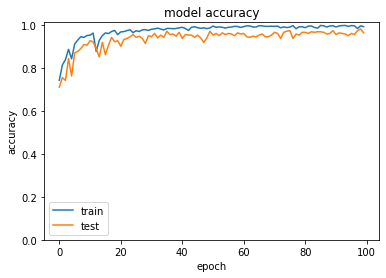

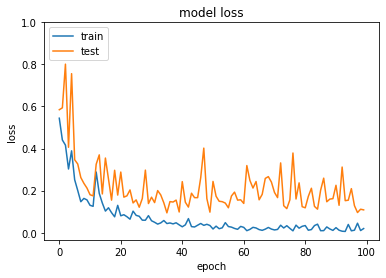

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower left')
plt.ylim(ymin=0)
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(ymax=1)
plt.show()

## Model 2 (C-C-MP-C-C-MP-C-MP)

In [0]:
model = Sequential()
#Convolve-Pool
model.add(Conv2D(64,(3,3), input_shape = (64,64,1), activation = 'relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#Flatten
model.add(Flatten())
#Fully-connected
model.add(Dense(units=128, activation = 'relu'))
model.add(Dense(units=128, activation = 'relu'))
model.add(Dense(units=1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 62, 62, 64)        640       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 62, 62, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 31, 31, 64)        36928     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 31, 31, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 15, 15, 64)       

In [0]:
checkpoint_path = "/content/drive/My Drive/training_2/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tensorflow.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
history = model.fit_generator(training_set,  epochs = 50, validation_data = validation_set,  shuffle=True, validation_steps=12,
          callbacks=[cp_callback])

Epoch 1/50
12/52 [=====>........................] - ETA: 4:40 - loss: 0.6925 - acc: 0.5026
Epoch 00001: saving model to /content/drive/My Drive/training_2/cp.ckpt
52/52 [==============================] - 91s 2s/step - loss: 0.5499 - acc: 0.7313 - val_loss: 0.6925 - val_acc: 0.5026
Epoch 2/50
12/52 [=====>........................] - ETA: 10s - loss: 0.4599 - acc: 0.8229
Epoch 00002: saving model to /content/drive/My Drive/training_2/cp.ckpt
52/52 [==============================] - 8s 150ms/step - loss: 0.4668 - acc: 0.8023 - val_loss: 0.4599 - val_acc: 0.8229
Epoch 3/50
12/52 [=====>........................] - ETA: 10s - loss: 0.4807 - acc: 0.7865
Epoch 00003: saving model to /content/drive/My Drive/training_2/cp.ckpt
52/52 [==============================] - 8s 153ms/step - loss: 0.4082 - acc: 0.8390 - val_loss: 0.4807 - val_acc: 0.7865
Epoch 4/50
12/52 [=====>........................] - ETA: 9s - loss: 0.4358 - acc: 0.8151 
Epoch 00004: saving model to /content/drive/My Drive/training_

In [0]:
model.save(filepath="/content/drive/My Drive/training_2/model.h5")

In [0]:
new_model = tensorflow.keras.models.load_model('/content/drive/My Drive/training_2/model.h5')
new_model.summary()
loss, acc = new_model.evaluate(validation_set, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100*acc))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 62, 62, 64)        640       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 62, 62, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 31, 31, 64)        36928     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 31, 31, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 15, 15, 64)       

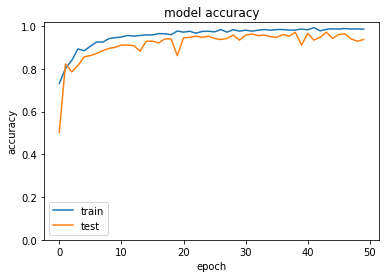

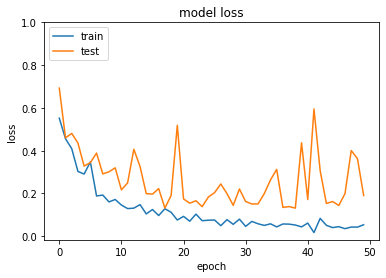

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower left')
plt.ylim(ymin=0)
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(ymax=1)
plt.show()